In [1]:
#Results analysis

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys
from glob import glob
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=False)
import h5py
import json
from tqdm.notebook import tqdm

import dataframe_image as dfi

In [4]:
from ukbb2020_dataloader import UKBB2020

In [5]:
sys.path.insert(0, "../../helper/")
from plotGraphs import *
from plotResults import plot_result

In [6]:
SAVE_DIR = "/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_8000_cuda01-h5files5tasks8000_moodbalanced/sex"

In [7]:
#watchout for the counter
counter = 9
new_csv = f"{SAVE_DIR}/run{counter}.csv"
print(new_csv)
for csv in glob(f"{SAVE_DIR}/run*.csv"):
    os.rename(csv, new_csv)
    counter += 1
    new_csv = f"{SAVE_DIR}/run{counter}.csv"

/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_8000_cuda01_mean_fornix-h5files5tasks8000_moodbalanced/20220822-0941/run9.csv


In [8]:
! mv /ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_8000_cuda01_mean_fornix-h5files5tasks8000_moodbalanced/20220822-0941/* /ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_8000_cuda01_mean_fornix-h5files5tasks8000_moodbalanced/20220820-1123/

mv: cannot move '/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_8000_cuda01_mean_fornix-h5files5tasks8000_moodbalanced/20220822-0941/useless' to '/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_8000_cuda01_mean_fornix-h5files5tasks8000_moodbalanced/20220820-1123/useless': File exists


In [7]:
##create the merged csv
df = pd.concat([pd.read_csv(csv) for csv in glob(f"{SAVE_DIR}/run*.csv")], ignore_index=True)
# delete the temp csv files generated in parallel
os.system(f"rm {SAVE_DIR}/run*.csv")  
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # drop unnamed columns            
df = df.sort_values(['model_name','inp','out','run_id']) # sort
df.to_csv(f"{SAVE_DIR}/run_merged.csv", index=False)  

In [11]:
df2000 = pd.read_csv("/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_2000_cuda02-h5files5tasks2000_moodbalanced/goodone/run.csv")
#df250 = pd.read_csv("/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse_last/CNNpipeline/results/UKBB_35k-h5files5tasks250_moodbalanced/20220719-1245/run.csv")
df250 = pd.read_csv("/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k_250_cuda02-h5files5tasks250_moodbalanced/20220808-1658/run.csv")
#df8000 = pd.read_csv("/ritter/share/projects/gonzalo/python_files/ML_for_alcohol_misuse/CNNpipeline/results/UKBB_35k-h5files5tasks2000_moodbalanced/20220720-0944/run.csv")

In [12]:
df2000red = df2000[['model_unique_name','out', 'val_accuracy_score','val_balanced_accuracy_score', 'val_explained_variance_score']].copy()
df2000red = df2000red.rename(columns = {'val_accuracy_score':'val_accuracy_score_2000' ,'val_balanced_accuracy_score' : 'val_balanced_accuracy_score_2000', 'val_explained_variance_score':'val_explained_variance_score_2000'})

In [13]:
df250red = df250[['val_accuracy_score','val_balanced_accuracy_score', 'val_explained_variance_score']].copy()
df250red = df250red.rename(columns = {'val_accuracy_score':'val_accuracy_score_250' ,'val_balanced_accuracy_score' : 'val_balanced_accuracy_score_250', 'val_explained_variance_score':'val_explained_variance_score_250'})

In [14]:
#dfred = df2000red.copy()
dfred = pd.concat([df250red,df2000red],)#[['val_accuracy_score_250','val_balanced_accuracy_score_250', 'val_explained_variance_score_250']]
dfred = dfred.sort_values('out')
dfred

,val_accuracy_score_250,val_balanced_accuracy_score_250,val_explained_variance_score_250,model_unique_name,out,val_accuracy_score_2000,val_balanced_accuracy_score_2000,val_explained_variance_score_2000
0,NaN,NaN,NaN,ResNet50_MRI_feature_extraction,alc_int_freq,0.353823,NaN,NaN
75,NaN,NaN,NaN,ResNet50_videos_feature_extraction,alc_int_freq,0.385307,NaN,NaN
30,NaN,NaN,NaN,ResNet50_Self_supervised_feature_extraction,alc_int_freq,0.377811,NaN,NaN
31,NaN,NaN,NaN,ResNet50_Self_supervised_feature_extraction,alc_int_freq,0.380810,NaN,NaN
32,NaN,NaN,NaN,ResNet50_Self_supervised_feature_extraction,alc_int_freq,0.397898,NaN,NaN
...,...,...,...,...,...,...,...,...
100,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
101,0.975904,0.978261,NaN,NaN,NaN,NaN,NaN,NaN
102,0.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,0.638554,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2000red = df2000red.sort_values('out')

In [19]:
df2000red

,model_unique_name,out,val_accuracy_score_2000,val_balanced_accuracy_score_2000,val_explained_variance_score_2000
0,ResNet50_MRI_feature_extraction,alc_int_freq,0.353823,NaN,NaN
75,ResNet50_videos_feature_extraction,alc_int_freq,0.385307,NaN,NaN
30,ResNet50_Self_supervised_feature_extraction,alc_int_freq,0.377811,NaN,NaN
31,ResNet50_Self_supervised_feature_extraction,alc_int_freq,0.380810,NaN,NaN
32,ResNet50_Self_supervised_feature_extraction,alc_int_freq,0.397898,NaN,NaN
...,...,...,...,...,...
103,ResNet50_videos_finetuning,srt_right_ear_classification,0.611694,NaN,NaN
27,ResNet50_MRI_finetuning,srt_right_ear_classification,0.380810,NaN,NaN
28,ResNet50_MRI_finetuning,srt_right_ear_classification,0.593703,NaN,NaN
12,ResNet50_MRI_feature_extraction,srt_right_ear_classification,0.512744,NaN,NaN


In [20]:
dfi.export(df2000red,"mytable_2000.png")

OSError: Chrome executable not able to be found on your machine

NameError: name 'table' is not defined

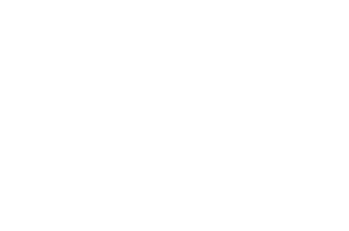

In [21]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df2000red)  # where df is your data frame

#plt.savefig('mytable_2000.png')

In [22]:
df2000allfinetuning = df2000[['finetun' in c or  c == 'ResNet50_baseline' for c in df2000.model_unique_name]]
df250allfinetuning = df250all[['finetun' in c or  c == 'ResNet50_baseline' for c in df250all.model_unique_name]]
df250allfeature = df250all[['feature' in c or c == 'ResNet50_baseline' for c in df250all.model_unique_name]] 

NameError: name 'df250all' is not defined

In [23]:
df250allfinetuning

NameError: name 'df250allfinetuning' is not defined

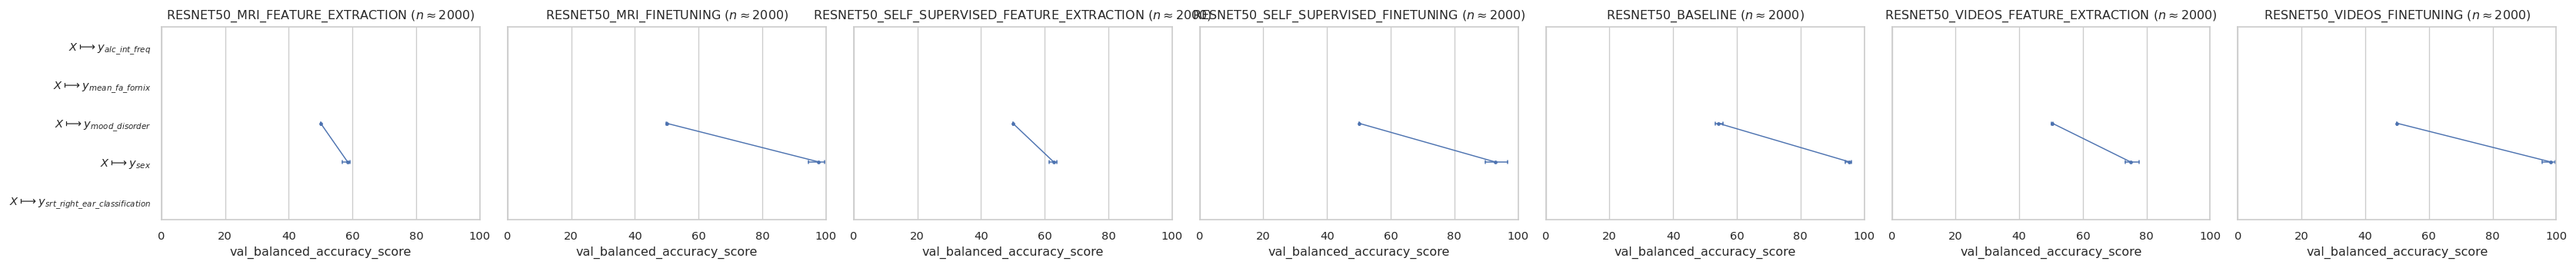

In [25]:
mets ='val_explained_variance_score' #'val_accuracy_score'
        #,'val_balanced_accuracy_score',
        #'val_explained_variance_score'
fig = plot_result(df2000, x=('val_balanced_accuracy_score'), 
                  legend=False,
                 colsgroupby='model_unique_name', join = True)
#plt.savefig('UKBB250_1stresults.png')
plt.show()

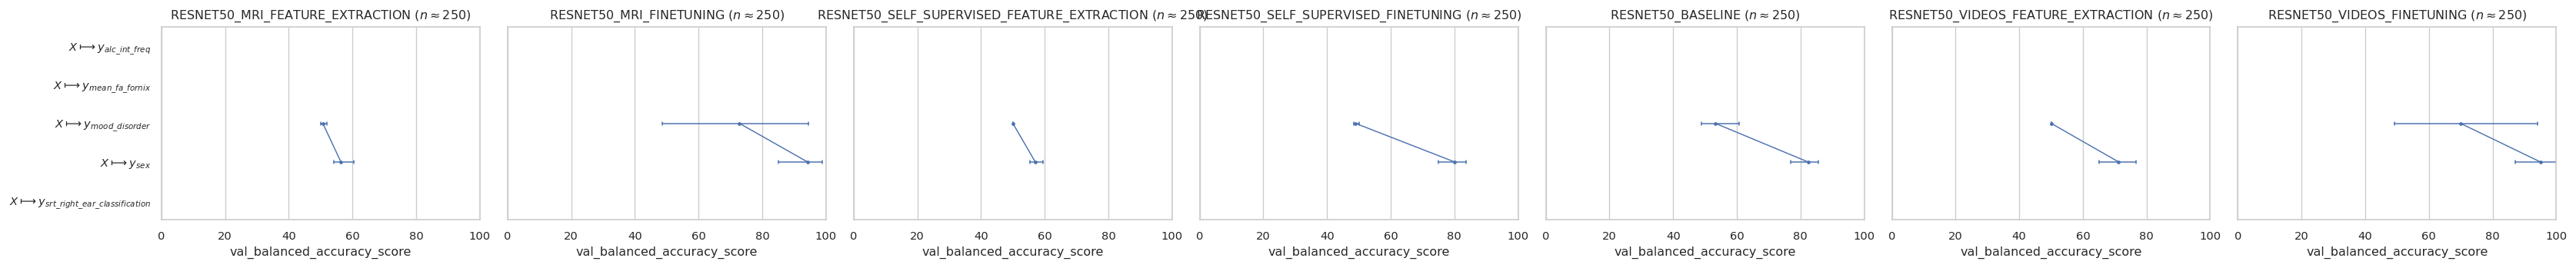

In [24]:
mets ='val_explained_variance_score' #'val_accuracy_score'
        #,'val_balanced_accuracy_score',
        #'val_explained_variance_score'
fig = plot_result(df250, x=('val_balanced_accuracy_score'), 
                  legend=False,
                 colsgroupby='model_unique_name', join = True)
#plt.savefig('UKBB250_1stresults.png')
plt.show()

In [51]:
for v in mets: 
    print(v)

val_balanced_accuracy_score
val_explained_variance_score
val_accuracy_score


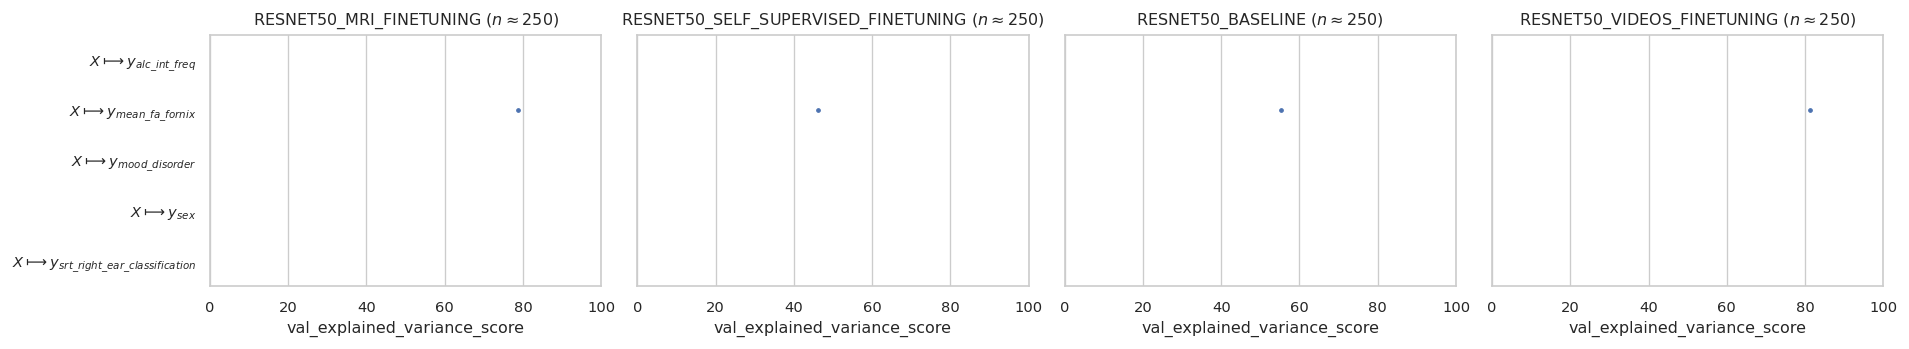

In [13]:
fig = plot_result(df250allfinetuning, x='val_explained_variance_score', 
                  legend=False,
                 colsgroupby='model_unique_name', join = True)
plt.savefig('UKBB250_1stresults.png')
plt.show()

In [ ]:
fig = plot_result(df250allfeature, x='val_accuracy_score', 
                  legend=False,
                 colsgroupby='model_unique_name', join = True)
plt.savefig('UKBB250_1stresults.png')
plt.show()

In [ ]:
fig = plot_result(df250, x='val_accuracy_score', 
                  legend=False,
                 colsgroupby='model_unique_name', join = True)
plt.savefig('UKBB250_1stresults.png')
plt.show()

In [ ]:
fig = plot_result(df2000, x='val_accuracy_score', 
                  legend=False,
                 colsgroupby='model_unique_name', join = True)
plt.savefig('UKBB2000_1stresults.png')
plt.show()

In [ ]:
fig = plot_result(df8000, x='val_accuracy_score', 
                  legend=False,
                 colsgroupby='model_unique_name', join = True)
plt.show()